# Image Stitching Template
___
18 Jan, 2022 - PHS edit to include creating a stitched-image folder  
12 Dec, 2022 - PHS edit to test BaSiC implementation (see first 3 code blocks)  
10 Jun, 2023 - DFM designate as main template  


**Fordyce Lab**, **2020**

**Pinney Lab**, **2023**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from htbam_analysis.stitching import scripts, rastering, stitching_settings, background_images

## Background

23-11-14 16:37:38 INFO     Stitching images | Ch: 5, Exp: None, Overlap: 0.1, Rot: -0.6


Running BaSiC for FF correction...


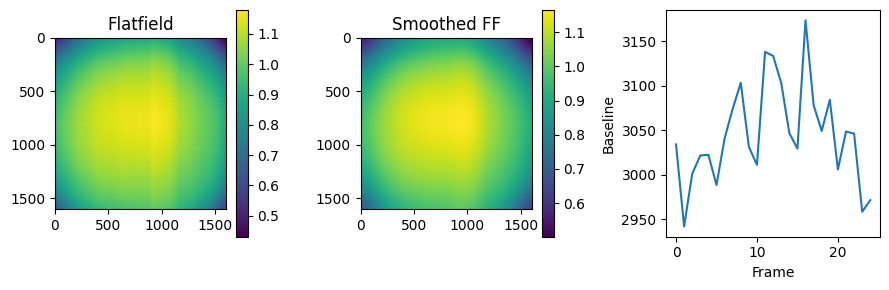

23-11-14 16:37:42 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000


completed BaSiC FF correction


In [8]:
## TEST BaSiC FF
bkgd_folder = '/Users/duncanmuir/Desktop/20231114_std_curve_test_data_duncan/20230712-130607-d2_bkgd_fura_1000_nadh_2x2_dynamic_range_4x_super_uv/'

settings = stitching_settings.StitchingSettings(
    setup_num = 1,
    tile_dim = 1600
    )

bg_button_param = rastering.raster_params.RasterParams(overlap=0.1, 
    size=1600, 
    acqui_ori=(True, False),
    rotation = -0.6,
    auto_ff = True,
    ff_type = 'BaSiC')

scripts.walk_and_stitch(path=bkgd_folder,
 stitch_settings=settings, params=bg_button_param, stitch_type = 'single')

## Button Quant

In [ ]:
## TEST BaSiC FF
button_quant_path = '/Volumes/DuncanSSD/20230426/standard'

scripts.walk_and_stitch(path=button_quant_path,
 stitch_settings=settings, params=bg_button_param, stitch_type = 'single')

# Kinetics

In [ ]:
kin_std_param = rastering.raster_params.RasterParams(overlap=0.1, 
    size=1600, 
    acqui_ori=(True, False),
    rotation = -0.6)

In [ ]:
## TEST BaSiC FF
kinetics_path = '/Volumes/DuncanSSD/20230610_test/kinetics/'

scripts.walk_and_stitch(path=kinetics_path,
 stitch_settings=settings, params=kin_std_param, stitch_type = 'kinetic')

<br>

## B. Standard Curve stitching (HT-MEK specific)

Stitching Standard:   0%|          | 0/8 [00:00<?, ?it/s]

Running BaSiC for FF correction...


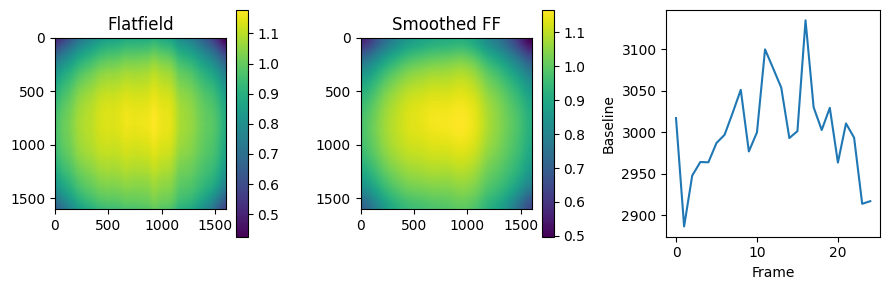

23-11-14 16:39:17 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard:  12%|█▎        | 1/8 [00:03<00:26,  3.79s/it]

completed BaSiC FF correction
Running BaSiC for FF correction...


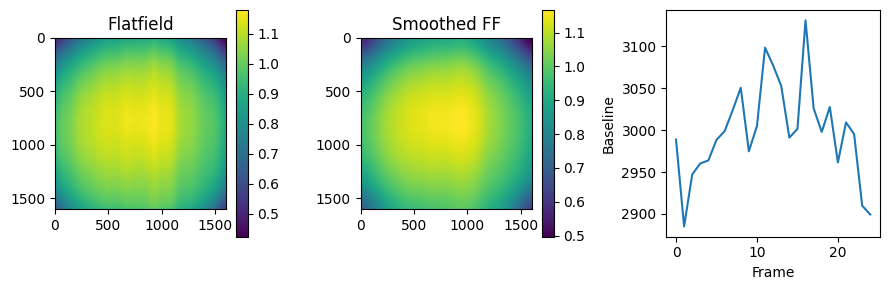

23-11-14 16:39:21 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard:  25%|██▌       | 2/8 [00:07<00:22,  3.78s/it]

completed BaSiC FF correction
Running BaSiC for FF correction...


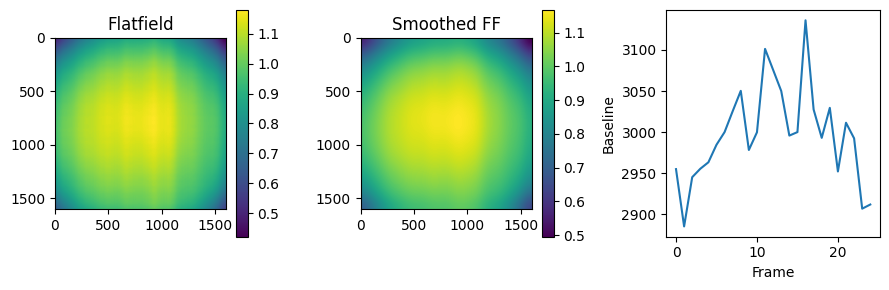

23-11-14 16:39:24 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard:  38%|███▊      | 3/8 [00:11<00:18,  3.73s/it]

completed BaSiC FF correction
Running BaSiC for FF correction...


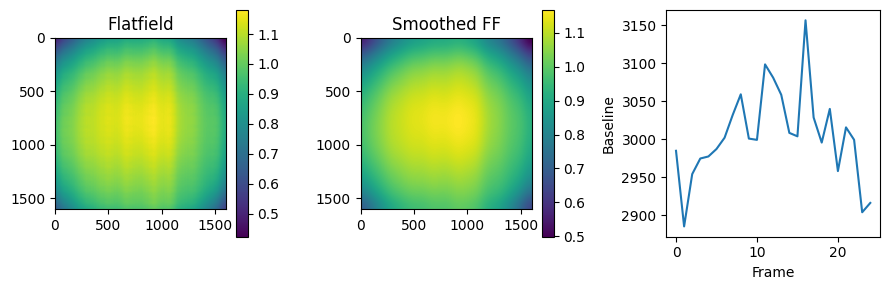

23-11-14 16:39:28 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard:  50%|█████     | 4/8 [00:14<00:14,  3.69s/it]

completed BaSiC FF correction
Running BaSiC for FF correction...


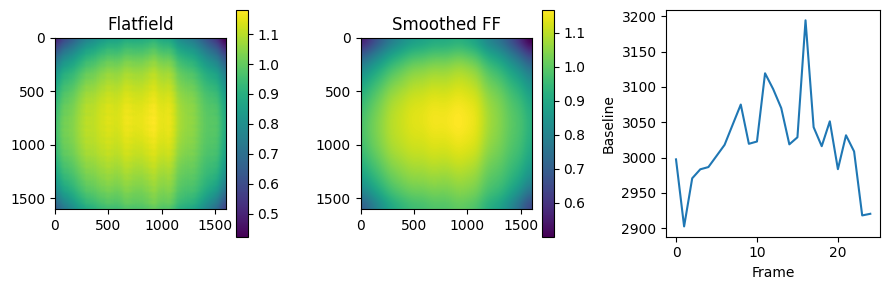

23-11-14 16:39:32 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard:  62%|██████▎   | 5/8 [00:18<00:11,  3.74s/it]

completed BaSiC FF correction
Running BaSiC for FF correction...


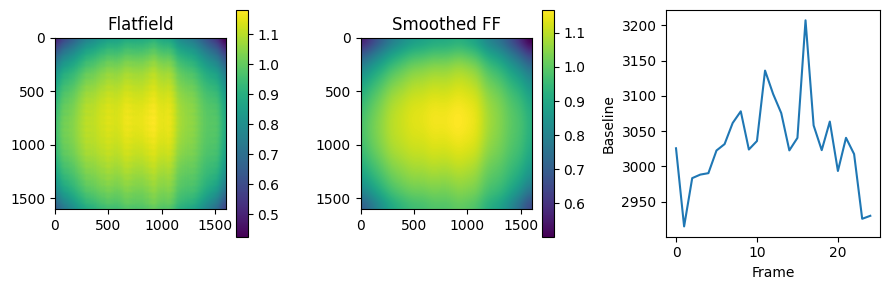

23-11-14 16:39:35 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard:  75%|███████▌  | 6/8 [00:22<00:07,  3.74s/it]

completed BaSiC FF correction
Running BaSiC for FF correction...


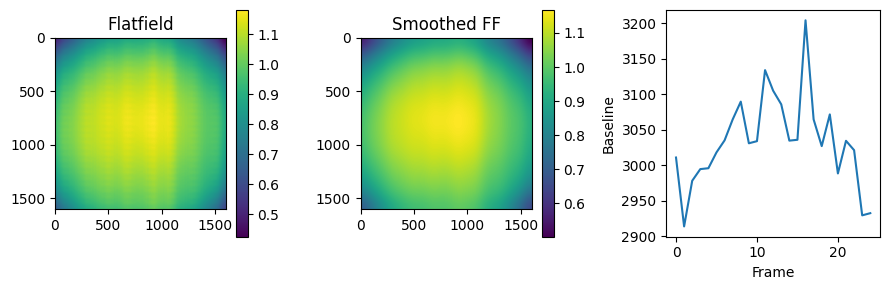

23-11-14 16:39:39 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard:  88%|████████▊ | 7/8 [00:26<00:03,  3.71s/it]

completed BaSiC FF correction
Running BaSiC for FF correction...


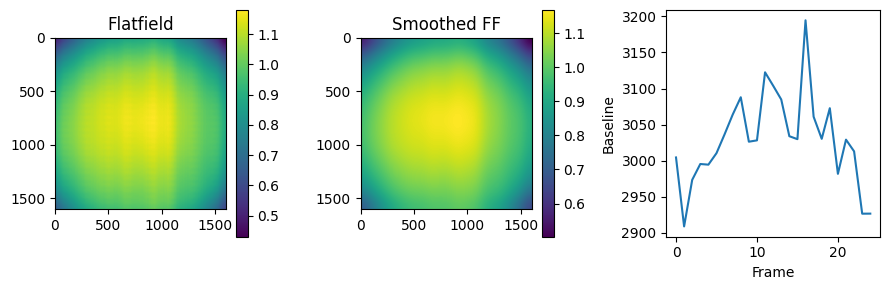

23-11-14 16:39:43 INFO     BaSiC Flat-Field Corrected Image | Ch: 5, Exp: 1000
Stitching Standard: 100%|██████████| 8/8 [00:30<00:00,  3.77s/it]

completed BaSiC FF correction


In [9]:
standard_path = '/Users/duncanmuir/Desktop/20231114_std_curve_test_data_duncan/standard/'

# NOTE: Make Sure to Follow This Exact Format!
# ('1_5625{conc_unit}_{FP_name}', '1_5625')
# Both values are strings, replace {conc_unit} with the unit of concentration,
# and replace {FP_name} with the name of the FP.
# i.e.,
# handles = [('3_90625uM_NADPH', "3_90625"), 
#            ('7_8125uM_NADPH', "7_8125"), 
#            ('15_625uM_NADPH', "15_625"), 
#            ('31_25uM_NADPH', "31_25"), 
#            ('62_5uM_NADPH', "62_5"),
#            ('125uM_NADPH', "125"),
#            ('250uM_NADPH', "250"),
#            ('500uM_NADPH', "500")]


handles = [('3_90625uM_NADPH', "3_90625"), 
           ('7_8125uM_NADPH', "7_8125"), 
           ('15_625uM_NADPH', "15_625"), 
           ('31_25uM_NADPH', "31_25"), 
           ('62_5uM_NADPH', "62_5"),
           ('125uM_NADPH', "125"),
           ('250uM_NADPH', "250"),
           ('500uM_NADPH', "500")]

scripts.stitch_standard(standard_path, kin_std_param, handles)

<br>

## C. Background subtract

In [10]:
bg = background_images.BackgroundImages()

#### Define paths and add to the backgrounds

In [17]:
# Reference Background Image
backgroundsRootD1 = "/Users/duncanmuir/Desktop/20231114_std_curve_test_data_duncan/20230712-130607-d2_bkgd_fura_1000_nadh_2x2_dynamic_range_4x_super_uv/5/StitchedImages/StitchedImg_1000_5_0.tif"
bg.add(backgroundsRootD1, 'd1', '5', 1000)


23-11-14 16:49:06 WARNING  Background image with features ('d1', '5', 1000) already exists. Overwriting...


#### Define target and execute

In [18]:
target = '/Users/duncanmuir/Desktop/20231114_std_curve_test_data_duncan/standard/'

bg.walk_and_bg_subtract(target, 'd1', '5')